<h1 style="color:red">Part 1: Data preprocessing</h1>

<h2 style="color: green">Diagnosing data </h2>

This section involves the diagnostic examination and analysis of data to identify any potential issues, errors, or anomalies that could impact the data accuracy and reliability.

Our dataset is about cars information scraped form the Wandaloo site. It contains the following columns:
- `Brand`: The name of the vehicle manufacturer
- `Model`: The specific type or design of vehicle within the brand
- `Version`: The specific variation or edition of a vehicle model
- `Price`: The vehicule's cost
- `Model year`:The year in which the model was released to the market for sale
- `Hand`: The number of previous owners a vehicle has had.
- `Mileage`: how far the vehicle has traveled over its lifetime.
- `Fuel type`: The fuel that powers the engine to produce the necessary energy for the propulsion of the vehicle.
- `Transmision`: It specifies if the vehicule is manual or automatic.
- `Fiscal horsepower`: The measure of the administrative power of a vehicle used in some countries to determine the amount of tax to be paid on the vehicle.
- `Exterior color`
- `Vehicule condition`: The current physical state of the vehicle, including its overall appearance and mechanical condition. 
- `Air conditionning`: The type of the air conditionning in the vehicule.
- `Electric windows`: Refers to electric windows that can be controlled with buttons.
- `Electric seats`: Refers to electric seats.
- `On-board computer`:The computerized system in a vehicle
- `Start & Stop`: The technology of turning off the engine when the vehicle is stationary and then restarting it when the driver is ready to move again.
- `Cruise control`: The feature in a vehicle that allows the driver to set and maintain a steady speed.
- `Automatic headlights`: The feature in a vehicle that allows the headlights to turn on and off automatically based on external lighting conditions.
- `Rain sensor`: The device that is installed on a vehicle's windshield and is designed to automatically activate the windshield wipers when it detects rain or moisture.
- `Steering wheel controls`: The feature in many modern vehicles that allow the driver to control certain functions of the car without taking their hands off the steering wheel. 
- `Touchscreen display`: The type of electronic visual display
- `Electric mirrors`: The feature in a vehicule that allow the driver to adjust the side mirrors with the push of a button.
- `Automatic trunk opening`: The featurethat allows the trunk to open and close automatically.
- `Hands-free start`: The feature a vehicle that allows the driver to start the engine without physically inserting a key into the ignition.
- `1/3-2/3 folding rear seat`: is a type of rear seat configuration commonly found in vehicles that allows the rear seat to be folded down in a flexible manner.
- `Backup camera`: a safety feature in modern vehicles that helps drivers see what is behind their vehicle when backing up.
- `Bluetooth`
- `Aluminum wheels`: a popular type of wheel used in modern vehicles.
- `Leather steering wheel`: a type of steering wheel that is covered in leather
- `Daytime running lights`: a safety feature found on many modern vehicles that are designed to improve visibility and reduce the risk of accidents during the day.
- `Roof rails`: The long bars that run along the length of the car's roof.
- `Roof`: The type of the roof
- `Airbags`: Safety devices in vehicles designed to inflate rapidly in the event of a collision
- `ABS`: Anti-lock Braking System
- `ESP`: Electronic Stability Program. It is a safety feature in vehicles designed to help drivers maintain control of their car during sudden maneuvers
- `Traction control`: a safety feature in vehicles designed to prevent the wheels from spinning during acceleration on slippery or uneven surfaces
- `Architecture`: The design and layout of the engine's components, including its cylinders, valves, and pistons. 
- `Engine displacement`: The measure of the total volume of all the cylinders in an internal combustion engine. 
- `City fuel consumption`: the amount of fuel that a vehicle uses while driving in city or urban environments with frequent starts and stops
- `Highway fuel consumption`: The amount of fuel that a vehicle uses while driving at high speeds on highways or motorways
- `Maximum speed`: maximun speed of the vehicule
- `Fuel tank volume`: the amount of fuel that a vehicle's fuel tank can hold

In [1]:
#### Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn  #Seaborn is a Python data visualization library based on matplotlib
import missingno as msno # Missing data visualization module for Python

import warnings
#"warnings" module in Python to filter out any warnings that might be raised during the execution of the code
warnings.filterwarnings('ignore')


In [71]:
#### Read the dataset

# Read in the dataset
data = pd.read_csv('wandaloo_cars.csv')


# Set display option to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Show the head
data.head(5)

,Brand,Model,Version,Price,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,Couleur extérieure,Etat du véhicule,Climatisation,Vitres électriques,Sièges électriques,Ordinateur de bord,Start & Stop,Régulateur de vitesse,Allumage auto. des feux,Détecteur de pluie,Commandes au volant,Ecran tactile,Rétroviseurs électriques,Ouverture auto. du coffre,Démarrage mains libres,Banquette arrière rabattable 1/3-2/3,Caméra de recul,Bluetooth,Jantes aluminium,Volant cuir,Feux de jour,Barres de toit,Toit,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,MERCEDES,Classe C 2014,220 d,228.000 DH,2014.0,Seconde,144.500 km,Diesel,Automatique,8 cv,Gris foncé,Très bon,auto. Bi-zone,Electrique AV/AR,Conducteur et Passager,oui,oui,oui,oui,oui,oui,non,non,non,oui,oui,oui,oui,oui,oui,oui,non,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
1,MERCEDES,Classe C 2003,220 CDI,79.000 DH,2003.0,Seconde,350.000 km,Diesel,Manuelle,8 cv,Noir,Très bon,auto.,Electrique AV/AR,Tous les passagers,oui,oui,oui,oui,oui,oui,oui,oui,oui,non,non,oui,oui,oui,non,oui,non,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
2,MERCEDES,Classe B 2013,180 d Urban,150.000 DH,2013.0,Seconde,144.000 km,Diesel,Manuelle,8 cv,Noir,Comme neuve,manuelle,Electrique AV/AR,non,oui,non,oui,oui,oui,oui,non,non,non,oui,oui,oui,oui,oui,oui,oui,non,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
3,MERCEDES,Classe E 2006,Autre version,135.000 DH,2006.0,Seconde,248.000 km,Diesel,Automatique,9 cv,Gris clair,Comme neuve,auto. Bi-zone,Electrique AV/AR,Conducteur et Passager,oui,non,oui,oui,oui,oui,non,oui,oui,oui,non,non,oui,oui,non,oui,oui,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
4,MERCEDES,CLA Coupé 2014,220 CDI,240.000 DH,2014.0,Seconde,103.000 km,Diesel,Automatique,9 cv,Blanc cassé,Excellent,auto.,Electrique AV/AR,Conducteur et Passager,oui,oui,oui,oui,oui,oui,non,oui,non,oui,non,oui,oui,oui,non,oui,non,Panoramique,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#### Rename the columns for better understanding

# Associate to each column its new name
column_map = {
    'Brand': 'Brand',
    'Model': 'Model',
    'Version': 'Version',
    'Price': 'Price',
    'Modèle': 'Model year',
    'Main': 'Hand',
    'Kilométrage': 'Mileage',
    'Carburant': 'Fuel type',
    'Transmision': 'Transmission',
    'Puissance fiscale': 'Fiscal horsepower', 
    'Couleur extérieure': 'Exterior color',
    'Etat du véhicule': 'Vehicle condition',
    'Climatisation': 'Air conditioning',
    'Vitres électriques': 'Electric windows',
    'Sièges électriques': 'Electric seats',
    'Ordinateur de bord': 'On-board computer',
    'Start & Stop': 'Start & Stop',
    'Régulateur de vitesse': 'Cruise control',
    'Allumage auto. des feux': 'Automatic headlights',
    'Détecteur de pluie': 'Rain sensor',
    'Commandes au volant': 'Steering wheel controls',
    'Ecran tactile': 'Touchscreen display',
    'Rétroviseurs électriques': 'Electric mirrors',
    'Ouverture auto. du coffre': 'Automatic trunk opening',
    'Démarrage mains libres': 'Hands-free start',
    'Banquette arrière rabattable 1/3-2/3': '1/3-2/3 folding rear seat',
    'Caméra de recul': 'Backup camera',
    'Bluetooth': 'Bluetooth',
    'Jantes aluminium': 'Aluminum wheels',
    'Volant cuir': 'Leather steering wheel',
    'Feux de jour': 'Daytime running lights',
    'Barres de toit': 'Roof rails',
    'Toit': 'Roof',
    'Airbags': 'Airbags',
    'ABS': 'ABS',
    'ESP': 'ESP',
    'Antipatinage': 'Traction control',
    'Architecture': 'Engine architecture',
    'Cylindrée': 'Engine displacement',
    'Conso. ville': 'City fuel consumption',
    'Conso. route': 'Highway fuel consumption',
    'Vitesse maxi.': 'Maximum speed',
    'Volume du réservoir': 'Fuel tank volume'
}

# Rename the columns using the map
data = data.rename(columns=column_map)

# Write the updated data to the same CSV file
data.to_csv('wandaloo_cars.csv', index=False)

# Show the changes
data.head()

,Brand,Model,Version,Price,Model year,Hand,Mileage,Fuel type,Transmission,Fiscal horsepower,Exterior color,Vehicle condition,Air conditioning,Electric windows,Electric seats,On-board computer,Start & Stop,Cruise control,Automatic headlights,Rain sensor,Steering wheel controls,Touchscreen display,Electric mirrors,Automatic trunk opening,Hands-free start,1/3-2/3 folding rear seat,Backup camera,Bluetooth,Aluminum wheels,Leather steering wheel,Daytime running lights,Roof rails,Roof,Airbags,ABS,ESP,Traction control,Engine architecture,Engine displacement,City fuel consumption,Highway fuel consumption,Maximum speed,Fuel tank volume,Sold
0,MERCEDES,Classe C 2014,220 d,228.000 DH,2014.0,Seconde,144.500 km,Diesel,Automatique,8 cv,Gris foncé,Très bon,auto. Bi-zone,Electrique AV/AR,Conducteur et Passager,oui,oui,oui,oui,oui,oui,non,non,non,oui,oui,oui,oui,oui,oui,oui,non,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,non
1,MERCEDES,Classe C 2003,220 CDI,79.000 DH,2003.0,Seconde,350.000 km,Diesel,Manuelle,8 cv,Noir,Très bon,auto.,Electrique AV/AR,Tous les passagers,oui,oui,oui,oui,oui,oui,oui,oui,oui,non,non,oui,oui,oui,non,oui,non,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,non
2,MERCEDES,Classe B 2013,180 d Urban,150.000 DH,2013.0,Seconde,144.000 km,Diesel,Manuelle,8 cv,Noir,Comme neuve,manuelle,Electrique AV/AR,non,oui,non,oui,oui,oui,oui,non,non,non,oui,oui,oui,oui,oui,oui,oui,non,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,non
3,MERCEDES,Classe E 2006,Autre version,135.000 DH,2006.0,Seconde,248.000 km,Diesel,Automatique,9 cv,Gris clair,Comme neuve,auto. Bi-zone,Electrique AV/AR,Conducteur et Passager,oui,non,oui,oui,oui,oui,non,oui,oui,oui,non,non,oui,oui,non,oui,oui,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,non
4,MERCEDES,CLA Coupé 2014,220 CDI,240.000 DH,2014.0,Seconde,103.000 km,Diesel,Automatique,9 cv,Blanc cassé,Excellent,auto.,Electrique AV/AR,Conducteur et Passager,oui,oui,oui,oui,oui,oui,non,oui,non,oui,non,oui,oui,oui,non,oui,non,Panoramique,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,non


In [4]:
# Show the head of the data to visually  identify problems

data.head(50)

,Brand,Model,Version,Price,Model year,Hand,Mileage,Fuel type,Transmission,Fiscal horsepower,Exterior color,Vehicle condition,Air conditioning,Electric windows,Electric seats,On-board computer,Start & Stop,Cruise control,Automatic headlights,Rain sensor,Steering wheel controls,Touchscreen display,Electric mirrors,Automatic trunk opening,Hands-free start,1/3-2/3 folding rear seat,Backup camera,Bluetooth,Aluminum wheels,Leather steering wheel,Daytime running lights,Roof rails,Roof,Airbags,ABS,ESP,Traction control,Engine architecture,Engine displacement,City fuel consumption,Highway fuel consumption,Maximum speed,Fuel tank volume,Sold
0,MERCEDES,Classe C 2014,220 d,228.000 DH,2014.0,Seconde,144.500 km,Diesel,Automatique,8 cv,Gris foncé,Très bon,auto. Bi-zone,Electrique AV/AR,Conducteur et Passager,oui,oui,oui,oui,oui,oui,non,non,non,oui,oui,oui,oui,oui,oui,oui,non,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,non
1,MERCEDES,Classe C 2003,220 CDI,79.000 DH,2003.0,Seconde,350.000 km,Diesel,Manuelle,8 cv,Noir,Très bon,auto.,Electrique AV/AR,Tous les passagers,oui,oui,oui,oui,oui,oui,oui,oui,oui,non,non,oui,oui,oui,non,oui,non,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,non
2,MERCEDES,Classe B 2013,180 d Urban,150.000 DH,2013.0,Seconde,144.000 km,Diesel,Manuelle,8 cv,Noir,Comme neuve,manuelle,Electrique AV/AR,non,oui,non,oui,oui,oui,oui,non,non,non,oui,oui,oui,oui,oui,oui,oui,non,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,non
3,MERCEDES,Classe E 2006,Autre version,135.000 DH,2006.0,Seconde,248.000 km,Diesel,Automatique,9 cv,Gris clair,Comme neuve,auto. Bi-zone,Electrique AV/AR,Conducteur et Passager,oui,non,oui,oui,oui,oui,non,oui,oui,oui,non,non,oui,oui,non,oui,oui,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,non
4,MERCEDES,CLA Coupé 2014,220 CDI,240.000 DH,2014.0,Seconde,103.000 km,Diesel,Automatique,9 cv,Blanc cassé,Excellent,auto.,Electrique AV/AR,Conducteur et Passager,oui,oui,oui,oui,oui,oui,non,oui,non,oui,non,oui,oui,oui,non,oui,non,Panoramique,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,non
5,MERCEDES,Classe E 2010,250 CDI BlueEfficiency Classic,150.000 DH VENDUE,2010.0,Seconde,169.950 km,Diesel,Automatique,9 cv,Gris,Très bon,auto. Bi-zone,Electrique AV/AR,Conducteur,oui,non,oui,oui,oui,oui,non,oui,oui,non,oui,oui,oui,oui,non,oui,non,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,oui
6,MERCEDES,Classe E 2016,220 d DCT Luxury,580.000 DH,2016.0,Seconde,18.000 km,Diesel,Automatique,8 cv,Noir,Comme neuve,auto. Multi-zone,Electrique AV/AR,Tous les passagers,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,non,oui,oui,non,oui,oui,non,Panoramique ouvrant,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,non
7,MERCEDES,Classe C 2013,200 d Avantgarde +,228.000 DH,2013.0,Première,155.000 km,Diesel,Automatique,9 cv,Gris,Comme neuve,auto. Bi-zone,Electrique AV/AR,Conducteur et Passager,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,non,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,non
8,MERCEDES,GLA 2017,200 d Urban,290.000 DH VENDUE,2017.0,Première,67.271 km,Diesel,Automatique,9 cv,Noir,Comme neuve,auto.,Electrique AV/AR,non,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,oui,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,oui
9,MERCEDES,CLA Coupé 2014,200 CDI,240.000 DH,2014.0,Seconde,87.000 km,Diesel,Manuelle,6 cv,Blanc,Très bon,auto.,Electrique AV/AR,non,oui,non,oui,oui,non,oui,non,non,oui,oui,non,oui,oui,oui,non,non,non,Rigide,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN,non


By visually inspecting the data, we can identify several possible issues:

**Data type problems**:
- **Problem 1**: The `Price` is a string with the 'DH' unit attached to every instance
- **Problem 2**: The `Mileage` is also a string with the 'km' unit attached to every distance
- **Problem 3**: The `Fiscal horsepower` is also a sting with the 'cv' unit attached to every value
- **Problem 4**: The `Model year` is presented as a float whereas it is a date
- **Problem 5**: The `Exterior Color` is presented by a string since it can be presented by a RGB format

**Missing data problems**:

- **Problem 6**: So much missing data in `Engine architecture`, `Engine displacement`, `City fuel consumption`, `Highway fuel consumption`, `Maximum speed`,and`Fuel tank volume` columns
- **Problem 7**: Empty rows
- **Problem 8**: Some colors are not mentioned

**Text/categorical data problems:**

- **Problem 9**: The model year is mentioned in the `model` column and has its own column
- **Problem 10**: For some vehicules, in the `Price` column there is 'VENDUE' which means that the vehicule was sold. We can make this in an other column

In [5]:
# Print data types of columns
data.dtypes

Brand                         object
Model                         object
Version                       object
Price                         object
Model year                   float64
Hand                          object
Mileage                       object
Fuel type                     object
Transmission                  object
Fiscal horsepower             object
Exterior color                object
Vehicle condition             object
Air conditioning              object
Electric windows              object
Electric seats                object
On-board computer             object
Start & Stop                  object
Cruise control                object
Automatic headlights          object
Rain sensor                   object
Steering wheel controls       object
Touchscreen display           object
Electric mirrors              object
Automatic trunk opening       object
Hands-free start              object
1/3-2/3 folding rear seat     object
Backup camera                 object
B

This confirms our previous observations and show as more data type problems:
- `Price` is an object not a float
- `Model year` is a float not a date
- `Mileage` is an object not a distance
- `Fiscal horepower` is an object whereas fiscal horsepower is represented as an integer value.

- **Problem 11**: `City fuel consumption` and `Highway fuel consumption` are object not floats as they represent the amount of fuel
- **Problem 12**: `Maximum speed` is an object not a float
- **Problem 13**:`Fuel tank volume` is an object not a float since it represents an amount of a liquid

In [6]:
# Print info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      3025 non-null   object 
 1   Model                      3025 non-null   object 
 2   Version                    3025 non-null   object 
 3   Price                      3025 non-null   object 
 4   Model year                 3025 non-null   float64
 5   Hand                       2176 non-null   object 
 6   Mileage                    3025 non-null   object 
 7   Fuel type                  3025 non-null   object 
 8   Transmission               2176 non-null   object 
 9   Fiscal horsepower          3025 non-null   object 
 10  Exterior color             3025 non-null   object 
 11  Vehicle condition          3025 non-null   object 
 12  Air conditioning           3025 non-null   object 
 13  Electric windows           3025 non-null   objec

Showing the data information conrfirms the following problems:
- Same amount of  missing data in `Engine architecture`, `Engine displacement`, `City fuel consumption`, `Highway fuel consumption`,and`Fuel tank volume` columns. So, they may be related.
- There is missing values in every column and a lot of them have the same number of missings values, what raises the possibility of the existence of empty rows
- **Problem 14**:There is more missings in `Model year` than `Model`, so we can fill some missing for this last.

In [7]:
# Print number of missing values
data.isna().sum()

Brand                           0
Model                           0
Version                         0
Price                           0
Model year                      0
Hand                          849
Mileage                         0
Fuel type                       0
Transmission                  849
Fiscal horsepower               0
Exterior color                  0
Vehicle condition               0
Air conditioning                0
Electric windows                0
Electric seats                 20
On-board computer               0
Start & Stop                    0
Cruise control                  0
Automatic headlights            0
Rain sensor                     0
Steering wheel controls         0
Touchscreen display             0
Electric mirrors                0
Automatic trunk opening       849
Hands-free start                0
1/3-2/3 folding rear seat       0
Backup camera                   0
Bluetooth                       0
Aluminum wheels                 0
Leather steeri

There is so much missing data, we can deal with this by:
- Remove missing values
- Imputation: filling in the missing values with a value that represents the missing data.
- Treat missing values as a separate category

In [8]:
# Print description of data for all columns
data.describe(include="all")

,Brand,Model,Version,Price,Model year,Hand,Mileage,Fuel type,Transmission,Fiscal horsepower,Exterior color,Vehicle condition,Air conditioning,Electric windows,Electric seats,On-board computer,Start & Stop,Cruise control,Automatic headlights,Rain sensor,Steering wheel controls,Touchscreen display,Electric mirrors,Automatic trunk opening,Hands-free start,1/3-2/3 folding rear seat,Backup camera,Bluetooth,Aluminum wheels,Leather steering wheel,Daytime running lights,Roof rails,Roof,Airbags,ABS,ESP,Traction control,Engine architecture,Engine displacement,City fuel consumption,Highway fuel consumption,Maximum speed,Fuel tank volume,Sold
count,3025,3025,3025,3025,3025.000000,2176,3025,3025,2176,3025,3025,3025,3025,3025,3005,3025,3025,3025,3025,3025,3025,3025,3025,2176,3025,3025,3025,3025,3025,3025,3025,3025,3025,3025,3025,3025,3025,826,826,826,826,849,826,3025
unique,33,1125,733,1101,NaN,2,632,4,2,42,22,6,8,5,5,2,2,2,2,2,2,2,2,2,2,2,2,2,11,2,2,2,4,11,2,2,2,11,69,85,62,98,51,2
top,VOLKSWAGEN,Clio 2017,Autre version,120.000 DH,NaN,Seconde,200.000 km,Diesel,Manuelle,6 cv,Autre couleur,Not described,auto. Bi-zone,Electrique AV/AR,non,oui,non,oui,oui,oui,oui,oui,oui,non,non,oui,non,oui,oui,non,oui,non,Rigide,oui,oui,oui,oui,4 cylindres,1.968 cm³,- l/100 km,- l/100 km,250 km/h,50 litre,non
freq,530,19,1221,36,NaN,1125,895,2761,1145,953,1133,1068,929,1918,1993,2173,1769,2167,1724,1573,2113,1643,2120,1770,1659,1637,1700,2097,1426,1825,1850,2307,2381,1919,2683,2214,2073,537,84,116,116,78,144,1955
mean,NaN,NaN,NaN,NaN,2012.004298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,4.584341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is 1127 models. So, we can anticipate some values since same models are more likely to have similar specifictions.

In [9]:
# Find types of fuel 
data['Fuel type'].unique()

array(['Diesel', 'Essence', 'Electrique', 'Hybride'], dtype=object)

- There is no problem with this



In [10]:
# Find different colors
data['Exterior color'].unique()

array(['Gris foncé', 'Noir', 'Gris clair', 'Blanc cassé', 'Gris', 'Blanc',
       'Bleu foncé', 'Autre couleur', 'Bleu', 'Beige', 'Bleu ciel',
       'Marron', 'Bordeau', 'Rouge', "Jaune d'or", 'Marron clair',
       'Orange', 'Violet', 'Vert foncé', 'Vert', 'Jaune', 'Rose'],
      dtype=object)

- We can replace all of '-' and 'nan' with 'Autre couleur' since a car has necessary a color



In [11]:
# Find vehicule conditions
data['Vehicle condition'].unique()

array(['Très bon', 'Comme neuve', 'Excellent', 'Bon', 'Not described',
       'Correct'], dtype=object)

**Problem 15**: Some cars do not have a state. We can create a new category for vehicule condition like 'Not described' for '-' and 'nan'

In [12]:
# Find air conditioning states
data['Air conditioning'].unique()

array(['auto. Bi-zone', 'auto.', 'manuelle', 'auto. Multi-zone',
       'auto. Tri-zone', 'non', 'تلقاءي.', 'auto. Quadri-zone'],
      dtype=object)

In [13]:
# How many values of different room_types do we have?
data['Air conditioning'].value_counts()

auto. Bi-zone        929
manuelle             926
auto.                510
non                  406
auto. Tri-zone       141
auto. Multi-zone      59
auto. Quadri-zone     53
تلقاءي.                1
Name: Air conditioning, dtype: int64

**Problem 16**: There is an uncessary cotergory in Air conditioning: 'تلقاءي.' .It can be replace with 'auto.'

In [14]:
# Find electric windows and seats categories
print(data['Electric windows'].unique())
print(data['Electric seats'].unique())

['Electrique AV/AR' 'Electrique AV' '-' 'Electrique AR' 'non']
['Conducteur et Passager' 'Tous les passagers' 'non' 'Conducteur' nan
 'Passager']


In [15]:
# Find aluminum wheels and airbags categories
print(data['Aluminum wheels'].unique())
print(data['Airbags'].unique())

['oui' 'non' '17 pouces' '18 pouces' '19 pouces' '20 pouces' '16 pouces'
 '21 pouces' '22 pouces' '15 pouces' '14 pouces']
['oui' 'non' '8.0' '6.0' '10.0' '7.0' '0.0' '2.0' '4.0' '9.0' '1.0']


In [16]:
# Find duplicates rows' number 
data.duplicated().sum()

0

**Problem 17**: There is 88 duplicated row

<h2 style="color: green">Cleaning data </h2>

<h2 style="color: blue">To do list: </h2>

_Dealing with missing data:_

- **Task 1**: Eliminate empty rows
- **Task 2**: Fill some missings if possible
- **Task 3**: Create some new categories for missings if possible
- **Task 4**: Eliminate some rows if possible.

<br>

_Text/categorical data problems:_

- **Task 7**: Replace the category `تلقاءي.` in `Air conditioning ` with `auto.`
- **Task 8**: Drop duplicated rows

<br>

_Dealing with data type problems:_

- **Task 1**: Remove 'DH' or 'DH VENDUE' from `Price` and convert it to `float`and create a column that indicated if a vehicule is sold or not.
- **Task 2**: Remove `km` from `Mileage` and convert it to `float`
- **Task 3**: Convert `Maximun speed` to float
- **Task 4**: Convert `City fuel consumption` and `Highway fuel consumption` to floats
- **Task 5**: Convert `Fuel tank volume` to floats








<h2 style="color: blue">Missing and Text/categorical data problems </h2>

<h3 style="color: purple">Task 8:</h3> Drop duplicated rows

In [17]:
#Number of entries in the data
print(f'There is {data.shape[0]} entries in our data')

# Number of duplicated rows
print(f'The number of duplicated rows {data.duplicated().sum()}')

# drop duplicated rows
data.drop_duplicates(inplace=True)

There is 3025 entries in our data
The number of duplicated rows 0


<h3 style="color: purple">Task 1:</h3> Drop empty rows

In [18]:
# Since there was some empty rows. So, there still an empty row after droping duplicated rows

# Drop index column
data = data.reset_index(drop=True)

# Drop the empty column
data = data.dropna(subset= data.columns[:], how="all")


# Create boolean mask for rows with 0 non-NaN values
mask = (data.notnull().sum(axis=1) == 0)

# Count number of rows with 0 non-NaN values
n_rows_with_0_non_nan = mask.sum()

print(f"The dataset has {n_rows_with_0_non_nan} empty rows ")
print(f'After removing duplicated and empty rows, we have {data.shape[0]} entries in our data')

The dataset has 0 empty rows 
After removing duplicated and empty rows, we have 3025 entries in our data


<h3 style="color: purple">Task 4:</h3> Eliminate some rows if possible.

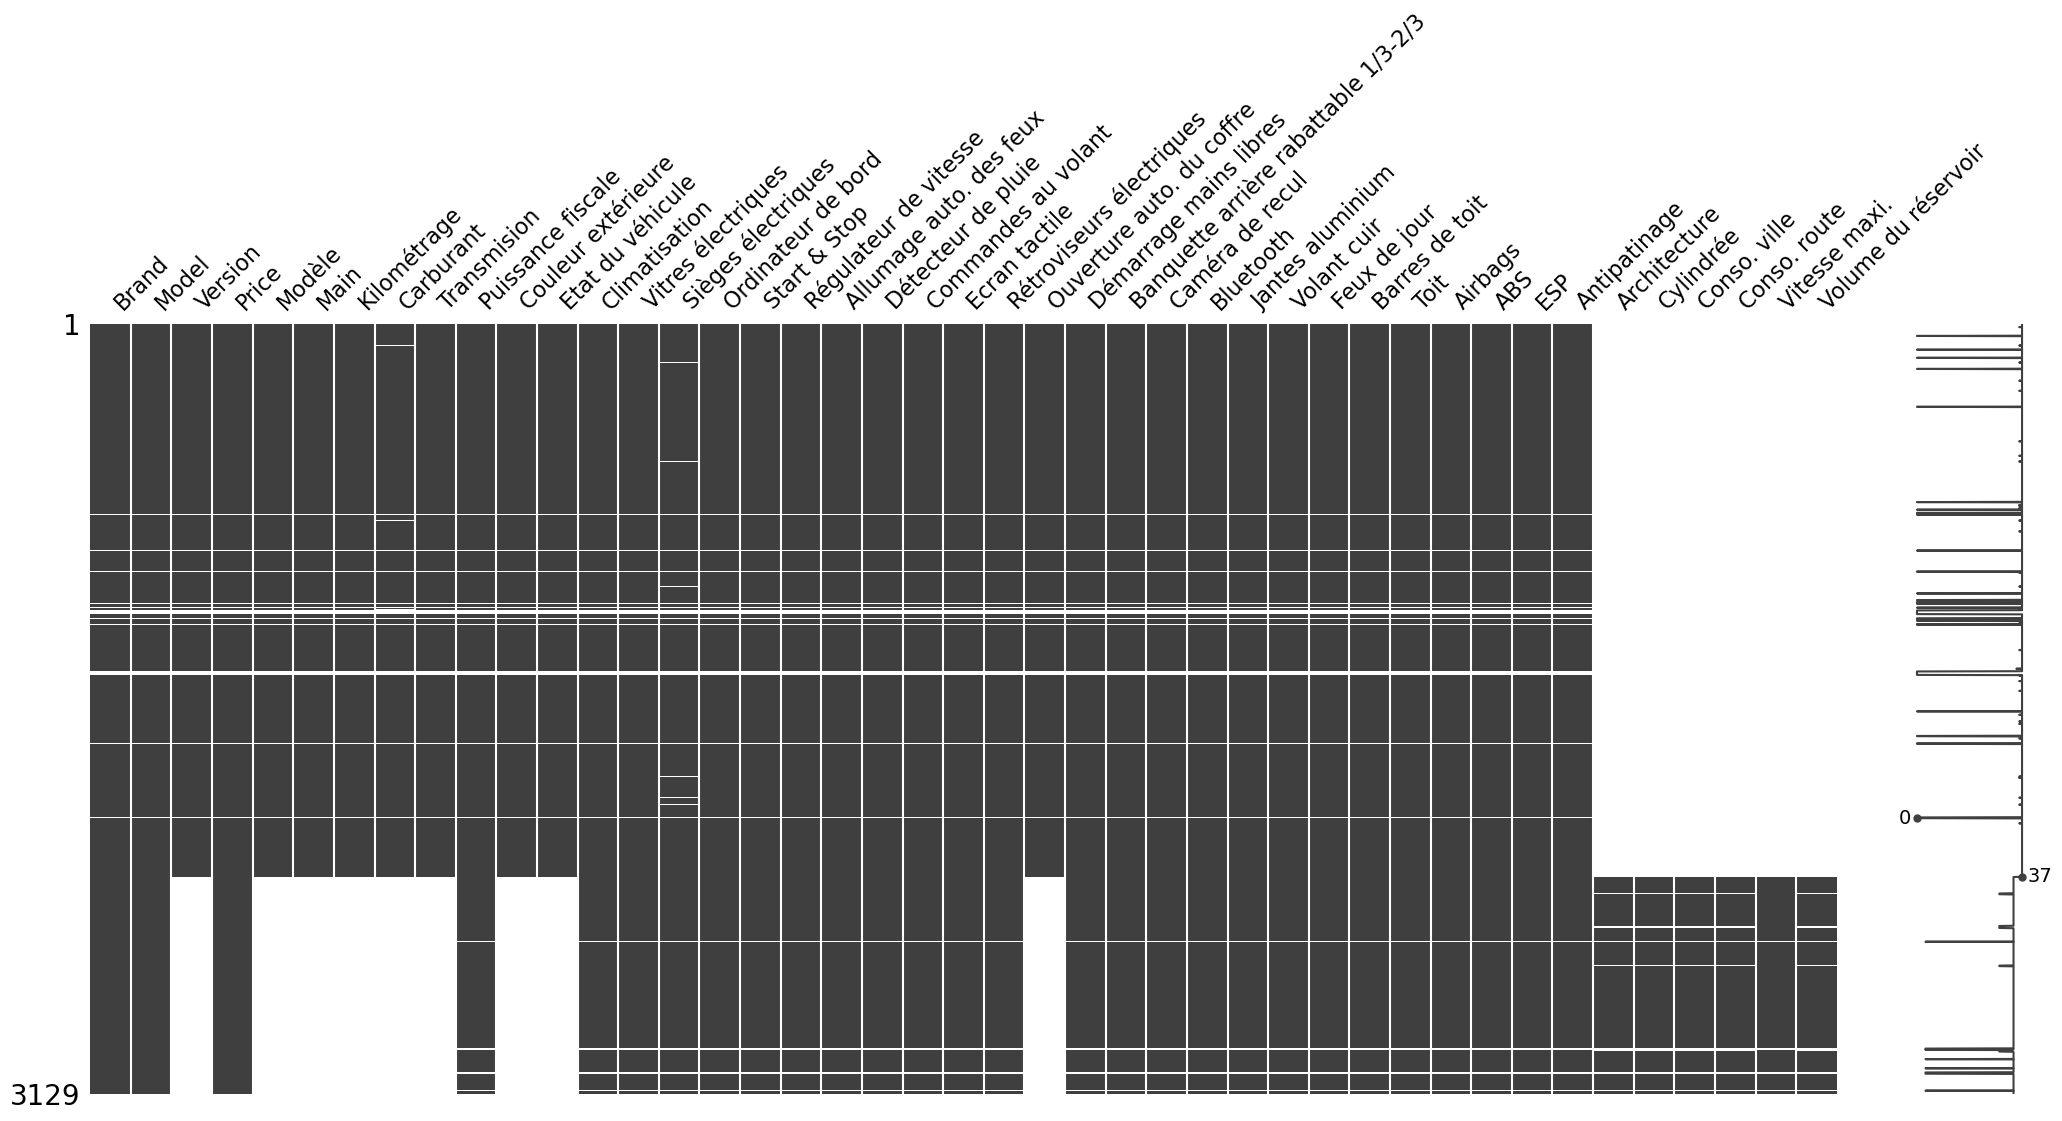

In [72]:
# Visualize the missingness 
msno.matrix(data)
plt.show()

We show the rows that have missing values for all columns except the first two columns

In [20]:
# create a mask for rows with 40 NaN values
mask_empty_rows = data.isna().sum(axis=1) == 40

# select rows with 40 NaN values using boolean indexing
rows_with_40_nans = data[mask]

# Show these rows
rows_with_40_nans

,Brand,Model,Version,Price,Model year,Hand,Mileage,Fuel type,Transmission,Fiscal horsepower,Exterior color,Vehicle condition,Air conditioning,Electric windows,Electric seats,On-board computer,Start & Stop,Cruise control,Automatic headlights,Rain sensor,Steering wheel controls,Touchscreen display,Electric mirrors,Automatic trunk opening,Hands-free start,1/3-2/3 folding rear seat,Backup camera,Bluetooth,Aluminum wheels,Leather steering wheel,Daytime running lights,Roof rails,Roof,Airbags,ABS,ESP,Traction control,Engine architecture,Engine displacement,City fuel consumption,Highway fuel consumption,Maximum speed,Fuel tank volume,Sold


In [21]:
# Look for columns with Brand 'FIAT' and model '500'

# use boolean indexing to select rows
mask = (data['Brand'] == 'FIAT') & (data['Model'] == '500')
data[mask]

,Brand,Model,Version,Price,Model year,Hand,Mileage,Fuel type,Transmission,Fiscal horsepower,Exterior color,Vehicle condition,Air conditioning,Electric windows,Electric seats,On-board computer,Start & Stop,Cruise control,Automatic headlights,Rain sensor,Steering wheel controls,Touchscreen display,Electric mirrors,Automatic trunk opening,Hands-free start,1/3-2/3 folding rear seat,Backup camera,Bluetooth,Aluminum wheels,Leather steering wheel,Daytime running lights,Roof rails,Roof,Airbags,ABS,ESP,Traction control,Engine architecture,Engine displacement,City fuel consumption,Highway fuel consumption,Maximum speed,Fuel tank volume,Sold
2437,FIAT,500,Autre version,136.900 DH * promo,2012.0,NaN,200.000 km,Diesel,NaN,7 cv,Autre couleur,Not described,manuelle,Electrique AV,non,oui,non,non,non,non,oui,non,oui,NaN,non,non,non,non,non,non,oui,non,Rigide,8.0,oui,oui,oui,4 cylindres,1.242 cm³,"6,2 l/100 km","4,2 l/100 km",160 km/h,35 litre,non
2438,FIAT,500,Autre version,153.500 DH * promo,2012.0,NaN,200.000 km,Diesel,NaN,7 cv,Autre couleur,Not described,auto.,Electrique AV,non,oui,non,non,non,non,oui,oui,oui,NaN,non,non,non,oui,15 pouces,non,oui,non,Panoramique,8.0,oui,oui,oui,4 cylindres,1.242 cm³,"6,2 l/100 km","4,2 l/100 km",160 km/h,35 litre,non
2439,FIAT,500,Autre version,162.900 DH * promo,2012.0,NaN,200.000 km,Diesel,NaN,7 cv,Autre couleur,Not described,auto.,Electrique AV,non,oui,non,non,non,non,oui,oui,oui,NaN,non,non,non,oui,15 pouces,oui,oui,non,Panoramique,8.0,oui,oui,oui,4 cylindres,1.242 cm³,"6,2 l/100 km","4,2 l/100 km",160 km/h,35 litre,non


Since, there is other rows with the same model '500' and Brand 'FIAT', we can drop the one that has just the Brand and the Model values.
We check for each row: if there is other rows that have the same brand and model, we drop it

In [22]:
# Look for columns with Brand 'PORSCHE' and model 'Cayenne'

# use boolean indexing to select rows
mask = (data['Brand'] == 'PORSCHE') & (data['Model'] == 'Cayenne')
data[mask]

,Brand,Model,Version,Price,Model year,Hand,Mileage,Fuel type,Transmission,Fiscal horsepower,Exterior color,Vehicle condition,Air conditioning,Electric windows,Electric seats,On-board computer,Start & Stop,Cruise control,Automatic headlights,Rain sensor,Steering wheel controls,Touchscreen display,Electric mirrors,Automatic trunk opening,Hands-free start,1/3-2/3 folding rear seat,Backup camera,Bluetooth,Aluminum wheels,Leather steering wheel,Daytime running lights,Roof rails,Roof,Airbags,ABS,ESP,Traction control,Engine architecture,Engine displacement,City fuel consumption,Highway fuel consumption,Maximum speed,Fuel tank volume,Sold
2854,PORSCHE,Cayenne,Autre version,961.000 DH * * Prix public,2012.0,NaN,200.000 km,Diesel,NaN,21 cv,Autre couleur,Not described,auto. Bi-zone,Electrique AV/AR,Conducteur et Passager,oui,oui,oui,oui,oui,oui,oui,oui,NaN,oui,oui,oui,oui,20 pouces,oui,oui,oui,Panoramique,10.0,oui,oui,oui,6 cylindres en V,2.995 cm³,- l/100 km,- l/100 km,253 km/h,90 litre,non


In [23]:
# Look for columns with Brand 'PORSCHE' and model 'Cayenne Coupé'

# use boolean indexing to select rows
mask = (data['Brand'] == 'PORSCHE') & (data['Model'] == 'Cayenne Coupé')
data[mask]

,Brand,Model,Version,Price,Model year,Hand,Mileage,Fuel type,Transmission,Fiscal horsepower,Exterior color,Vehicle condition,Air conditioning,Electric windows,Electric seats,On-board computer,Start & Stop,Cruise control,Automatic headlights,Rain sensor,Steering wheel controls,Touchscreen display,Electric mirrors,Automatic trunk opening,Hands-free start,1/3-2/3 folding rear seat,Backup camera,Bluetooth,Aluminum wheels,Leather steering wheel,Daytime running lights,Roof rails,Roof,Airbags,ABS,ESP,Traction control,Engine architecture,Engine displacement,City fuel consumption,Highway fuel consumption,Maximum speed,Fuel tank volume,Sold
2855,PORSCHE,Cayenne Coupé,Autre version,1.260.000 DH * * Prix public,2012.0,NaN,200.000 km,Diesel,NaN,21 cv,Autre couleur,Not described,auto. Bi-zone,Electrique AV/AR,Conducteur et Passager,oui,oui,oui,oui,oui,oui,oui,oui,NaN,oui,oui,oui,oui,20 pouces,oui,oui,oui,Panoramique,10.0,oui,oui,oui,6 cylindres en V,2.995 cm³,- l/100 km,- l/100 km,253 km/h,90 litre,non


In [24]:
# Look for columns with Brand 'SEAT' and model 'Ibiza'

# use boolean indexing to select rows
mask = (data['Brand'] == 'SEAT') & (data['Model'] == 'Ibiza')
data[mask]

,Brand,Model,Version,Price,Model year,Hand,Mileage,Fuel type,Transmission,Fiscal horsepower,Exterior color,Vehicle condition,Air conditioning,Electric windows,Electric seats,On-board computer,Start & Stop,Cruise control,Automatic headlights,Rain sensor,Steering wheel controls,Touchscreen display,Electric mirrors,Automatic trunk opening,Hands-free start,1/3-2/3 folding rear seat,Backup camera,Bluetooth,Aluminum wheels,Leather steering wheel,Daytime running lights,Roof rails,Roof,Airbags,ABS,ESP,Traction control,Engine architecture,Engine displacement,City fuel consumption,Highway fuel consumption,Maximum speed,Fuel tank volume,Sold
2891,SEAT,Ibiza,Autre version,192.900 DH * promo,2012.0,NaN,200.000 km,Diesel,NaN,6 cv,Autre couleur,Not described,manuelle,Electrique AV/AR,non,oui,non,oui,non,non,oui,oui,oui,NaN,non,oui,non,oui,15 pouces,non,oui,non,Rigide,6.0,oui,oui,oui,4 cylindres,1.598 cm³,"4,4 l/100 km","3,5 l/100 km",182 km/h,40 litre,non
2892,SEAT,Ibiza,Autre version,229.900 DH * promo,2012.0,NaN,200.000 km,Diesel,NaN,6 cv,Autre couleur,Not described,auto. Bi-zone,Electrique AV/AR,non,oui,non,oui,oui,oui,oui,oui,oui,NaN,oui,oui,oui,oui,18 pouces,oui,oui,non,Panoramique ouvrant,6.0,oui,oui,oui,4 cylindres,1.598 cm³,"4,4 l/100 km","3,5 l/100 km",182 km/h,40 litre,non
2893,SEAT,Ibiza,Autre version,147.900 DH * promo,2012.0,NaN,200.000 km,Diesel,NaN,6 cv,Autre couleur,Not described,manuelle,Electrique AV/AR,non,oui,non,oui,non,non,oui,oui,oui,NaN,non,oui,non,oui,15 pouces,non,oui,non,Rigide,6.0,oui,oui,oui,3 cylindres,999 cm³,"6,0 l/100 km","4,3 l/100 km",167 km/h,40 litre,non
2894,SEAT,Ibiza,Autre version,163.900 DH * promo,2012.0,NaN,200.000 km,Diesel,NaN,6 cv,Autre couleur,Not described,auto. Bi-zone,Electrique AV/AR,non,oui,non,oui,oui,oui,oui,oui,oui,NaN,non,oui,non,oui,15 pouces,oui,oui,non,Rigide,6.0,oui,oui,oui,3 cylindres,999 cm³,"6,0 l/100 km","4,3 l/100 km",167 km/h,40 litre,non
2895,SEAT,Ibiza,Autre version,164.900 DH * promo,2012.0,NaN,200.000 km,Diesel,NaN,6 cv,Autre couleur,Not described,auto. Bi-zone,Electrique AV/AR,non,oui,non,oui,oui,oui,oui,oui,oui,NaN,non,oui,non,oui,15 pouces,oui,oui,non,Rigide,6.0,oui,oui,oui,3 cylindres,999 cm³,"6,0 l/100 km","4,3 l/100 km",167 km/h,40 litre,non
2896,SEAT,Ibiza,Autre version,171.900 DH * promo,2012.0,NaN,200.000 km,Diesel,NaN,6 cv,Autre couleur,Not described,auto. Bi-zone,Electrique AV/AR,non,oui,non,oui,oui,oui,oui,oui,oui,NaN,non,oui,oui,oui,15 pouces,oui,oui,non,Panoramique ouvrant,6.0,oui,oui,oui,3 cylindres,999 cm³,"6,0 l/100 km","4,3 l/100 km",167 km/h,40 litre,non


In [25]:
# Look for columns with Brand 'SKODA' and model 'Karoq'

# use boolean indexing to select rows
mask = (data['Brand'] == 'SKODA') & (data['Model'] == 'Karoq')
data[mask]

,Brand,Model,Version,Price,Model year,Hand,Mileage,Fuel type,Transmission,Fiscal horsepower,Exterior color,Vehicle condition,Air conditioning,Electric windows,Electric seats,On-board computer,Start & Stop,Cruise control,Automatic headlights,Rain sensor,Steering wheel controls,Touchscreen display,Electric mirrors,Automatic trunk opening,Hands-free start,1/3-2/3 folding rear seat,Backup camera,Bluetooth,Aluminum wheels,Leather steering wheel,Daytime running lights,Roof rails,Roof,Airbags,ABS,ESP,Traction control,Engine architecture,Engine displacement,City fuel consumption,Highway fuel consumption,Maximum speed,Fuel tank volume,Sold
2926,SKODA,Karoq,Autre version,289.000 DH * * Prix public,2012.0,NaN,200.000 km,Diesel,NaN,8 cv,Autre couleur,Not described,manuelle,Electrique AV/AR,non,oui,non,oui,non,non,oui,oui,oui,NaN,non,oui,non,oui,17 pouces,oui,oui,oui,Rigide,4.0,oui,oui,oui,4 cylindres,1.968 cm³,"6,5 l/100 km","4,6 l/100 km",188 km/h,55 litre,non
2927,SKODA,Karoq,Autre version,314.000 DH * * Prix public,2012.0,NaN,200.000 km,Diesel,NaN,8 cv,Autre couleur,Not described,auto.,Electrique AV/AR,non,oui,non,oui,oui,oui,oui,oui,oui,NaN,oui,oui,oui,oui,17 pouces,oui,oui,oui,Rigide,4.0,oui,oui,oui,4 cylindres,1.968 cm³,"6,5 l/100 km","4,6 l/100 km",188 km/h,55 litre,non
2928,SKODA,Karoq,Autre version,354.000 DH * * Prix public,2012.0,NaN,200.000 km,Diesel,NaN,8 cv,Autre couleur,Not described,auto.,Electrique AV/AR,non,oui,non,oui,oui,oui,oui,oui,oui,NaN,oui,oui,oui,oui,18 pouces,oui,oui,oui,Panoramique ouvrant,6.0,oui,oui,oui,4 cylindres,1.968 cm³,"6,5 l/100 km","4,6 l/100 km",188 km/h,55 litre,non


In [26]:
# Look for columns with Brand 'SUZUKI' and model 'Ignis'

# use boolean indexing to select rows
mask = (data['Brand'] == 'SUZUKI') & (data['Model'] == 'Ignis')
data[mask]

,Brand,Model,Version,Price,Model year,Hand,Mileage,Fuel type,Transmission,Fiscal horsepower,Exterior color,Vehicle condition,Air conditioning,Electric windows,Electric seats,On-board computer,Start & Stop,Cruise control,Automatic headlights,Rain sensor,Steering wheel controls,Touchscreen display,Electric mirrors,Automatic trunk opening,Hands-free start,1/3-2/3 folding rear seat,Backup camera,Bluetooth,Aluminum wheels,Leather steering wheel,Daytime running lights,Roof rails,Roof,Airbags,ABS,ESP,Traction control,Engine architecture,Engine displacement,City fuel consumption,Highway fuel consumption,Maximum speed,Fuel tank volume,Sold


In [27]:
# Look for columns with Brand 'SUZUKI' and model 'Swift'

# use boolean indexing to select rows
mask = (data['Brand'] == 'SUZUKI') & (data['Model'] == 'Swift')
data[mask]

,Brand,Model,Version,Price,Model year,Hand,Mileage,Fuel type,Transmission,Fiscal horsepower,Exterior color,Vehicle condition,Air conditioning,Electric windows,Electric seats,On-board computer,Start & Stop,Cruise control,Automatic headlights,Rain sensor,Steering wheel controls,Touchscreen display,Electric mirrors,Automatic trunk opening,Hands-free start,1/3-2/3 folding rear seat,Backup camera,Bluetooth,Aluminum wheels,Leather steering wheel,Daytime running lights,Roof rails,Roof,Airbags,ABS,ESP,Traction control,Engine architecture,Engine displacement,City fuel consumption,Highway fuel consumption,Maximum speed,Fuel tank volume,Sold


In [28]:
# Look for columns with Brand 'VOLVO' and model 'XC40'

# use boolean indexing to select rows
mask = (data['Brand'] == 'VOLVO') & (data['Model'] == 'XC40')
data[mask]

,Brand,Model,Version,Price,Model year,Hand,Mileage,Fuel type,Transmission,Fiscal horsepower,Exterior color,Vehicle condition,Air conditioning,Electric windows,Electric seats,On-board computer,Start & Stop,Cruise control,Automatic headlights,Rain sensor,Steering wheel controls,Touchscreen display,Electric mirrors,Automatic trunk opening,Hands-free start,1/3-2/3 folding rear seat,Backup camera,Bluetooth,Aluminum wheels,Leather steering wheel,Daytime running lights,Roof rails,Roof,Airbags,ABS,ESP,Traction control,Engine architecture,Engine displacement,City fuel consumption,Highway fuel consumption,Maximum speed,Fuel tank volume,Sold
3011,VOLVO,XC40,Autre version,410.000 DH * * Prix public,2012.0,NaN,200.000 km,Diesel,NaN,8 cv,Autre couleur,Not described,auto.,Electrique AV/AR,Conducteur,oui,oui,oui,oui,oui,oui,oui,oui,NaN,oui,oui,oui,oui,19 pouces,oui,oui,oui,Rigide,7.0,oui,oui,oui,3 cylindres,1.477 cm³,"8,3 l/100 km","5,4 l/100 km",200 km/h,54 litre,non
3012,VOLVO,XC40,Autre version,410.000 DH * * Prix public,2012.0,NaN,200.000 km,Diesel,NaN,8 cv,Autre couleur,Not described,auto.,Electrique AV/AR,Conducteur,oui,oui,oui,oui,oui,oui,oui,oui,NaN,oui,oui,oui,oui,18 pouces,oui,oui,oui,Rigide,7.0,oui,oui,oui,3 cylindres,1.477 cm³,"8,3 l/100 km","5,4 l/100 km",200 km/h,54 litre,non
3013,VOLVO,XC40,Autre version,530.000 DH * * Prix public,2012.0,NaN,200.000 km,Diesel,NaN,8 cv,Autre couleur,Not described,auto.,Electrique AV/AR,Conducteur,oui,oui,oui,oui,oui,oui,oui,oui,NaN,oui,oui,oui,oui,18 pouces,oui,oui,oui,Rigide,7.0,oui,oui,oui,3 cylindres,1.477 cm³,- l/100 km,- l/100 km,180 km/h,54 litre,non
3014,VOLVO,XC40,Autre version,560.000 DH * * Prix public,2012.0,NaN,200.000 km,Diesel,NaN,8 cv,Autre couleur,Not described,auto.,Electrique AV/AR,Conducteur,oui,oui,oui,oui,oui,oui,oui,oui,NaN,oui,oui,oui,oui,19 pouces,oui,oui,oui,Panoramique ouvrant,7.0,oui,oui,oui,3 cylindres,1.477 cm³,- l/100 km,- l/100 km,180 km/h,54 litre,non
3015,VOLVO,XC40,Autre version,560.000 DH * * Prix public,2012.0,NaN,200.000 km,Diesel,NaN,8 cv,Autre couleur,Not described,auto.,Electrique AV/AR,Conducteur,oui,oui,oui,oui,oui,oui,oui,oui,NaN,oui,oui,oui,oui,18 pouces,oui,oui,oui,Panoramique ouvrant,7.0,oui,oui,oui,3 cylindres,1.477 cm³,- l/100 km,- l/100 km,180 km/h,54 litre,non


Since for all the rows with 40 null values, there is a row that has the same brand and model, we drop these rows
We drop also the rows of SUZUKI even that there is no other rows with the same brand (Because, there is just 6 rows of it. So, it is not going to influence our data)

In [29]:
# drop rows with 40 NaN values
data = data.drop(mask_empty_rows[mask_empty_rows].index)
print(f'Now, we have {data.shape[0]} entries')

Now, we have 3025 entries


<h3 style="color: purple">Task 2/3:</h3> 
- Fill some missings if possible
- Create some new categories for missings if possible

<AxesSubplot:>

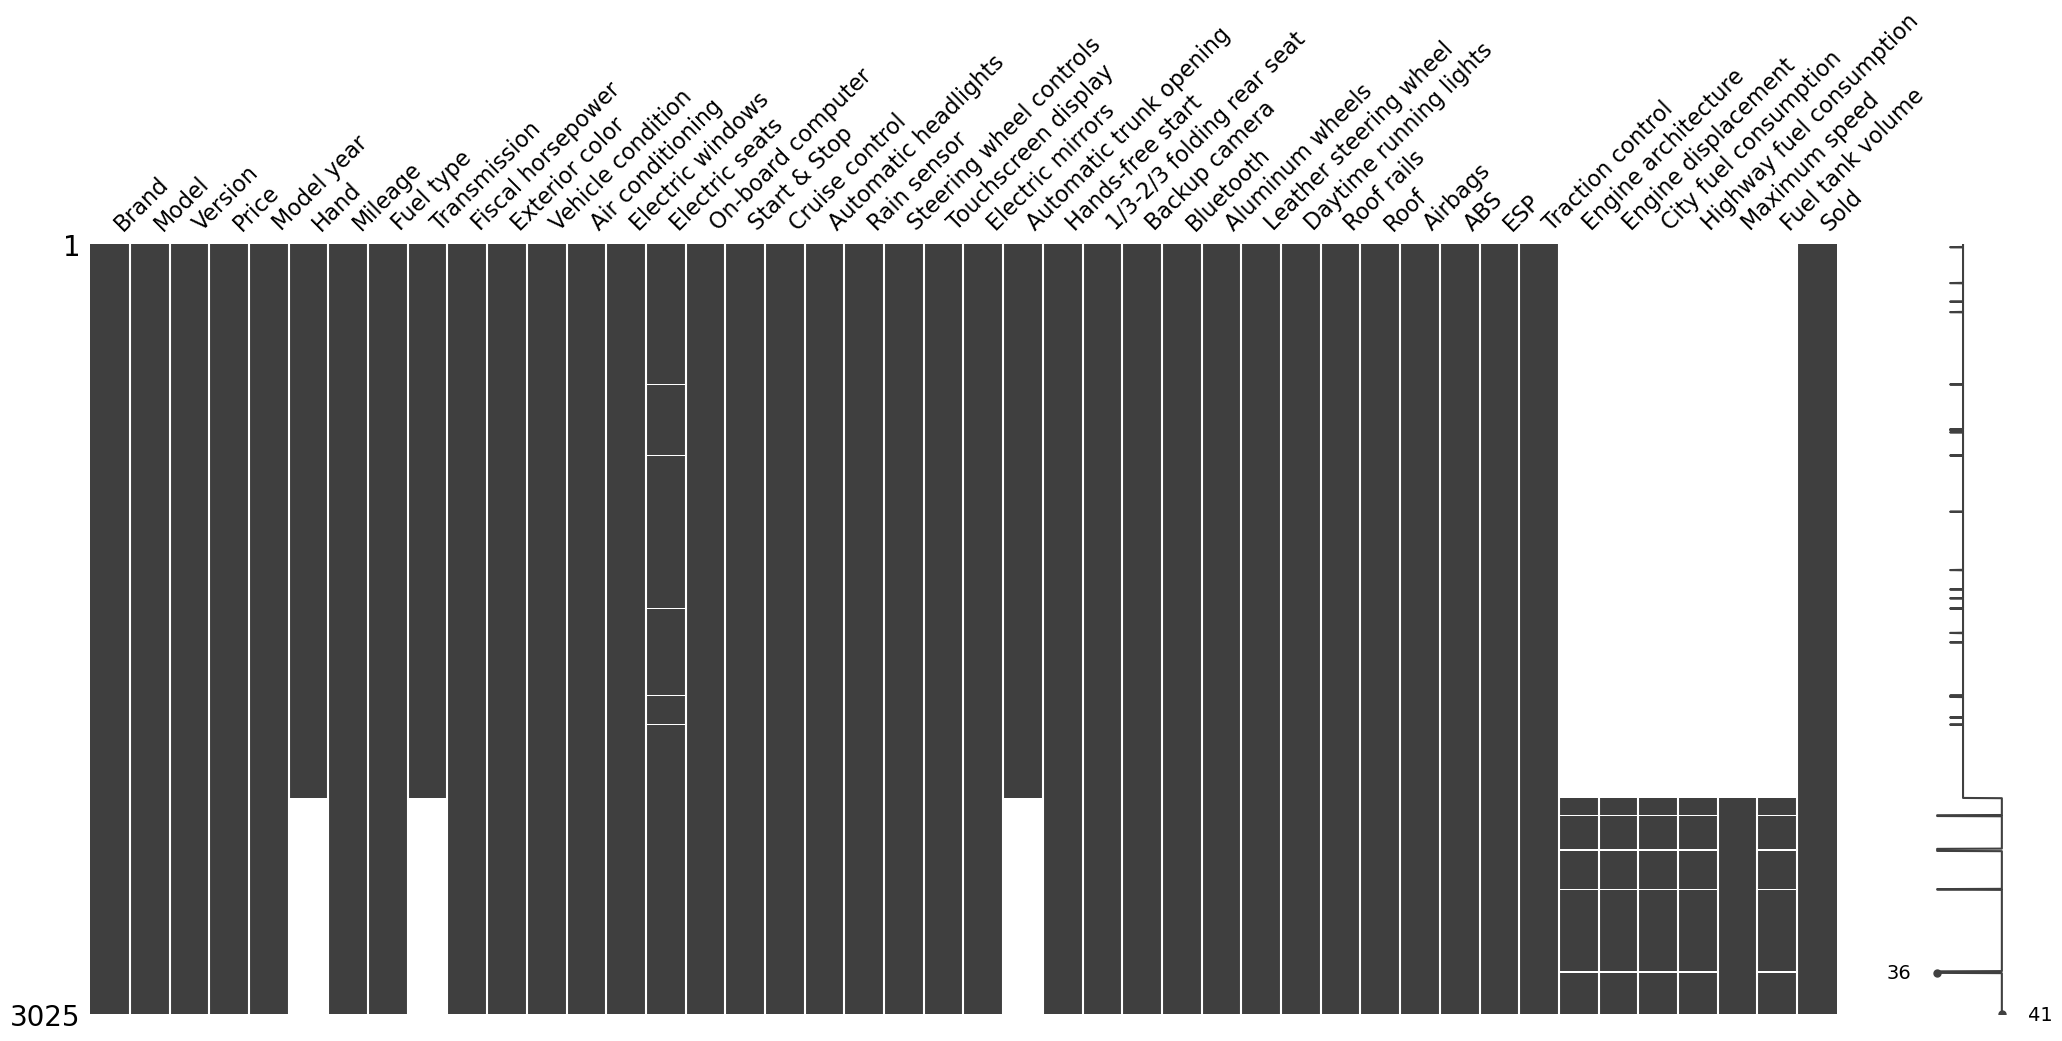

In [67]:
# Show the missings
msno.matrix(data)

<AxesSubplot:>

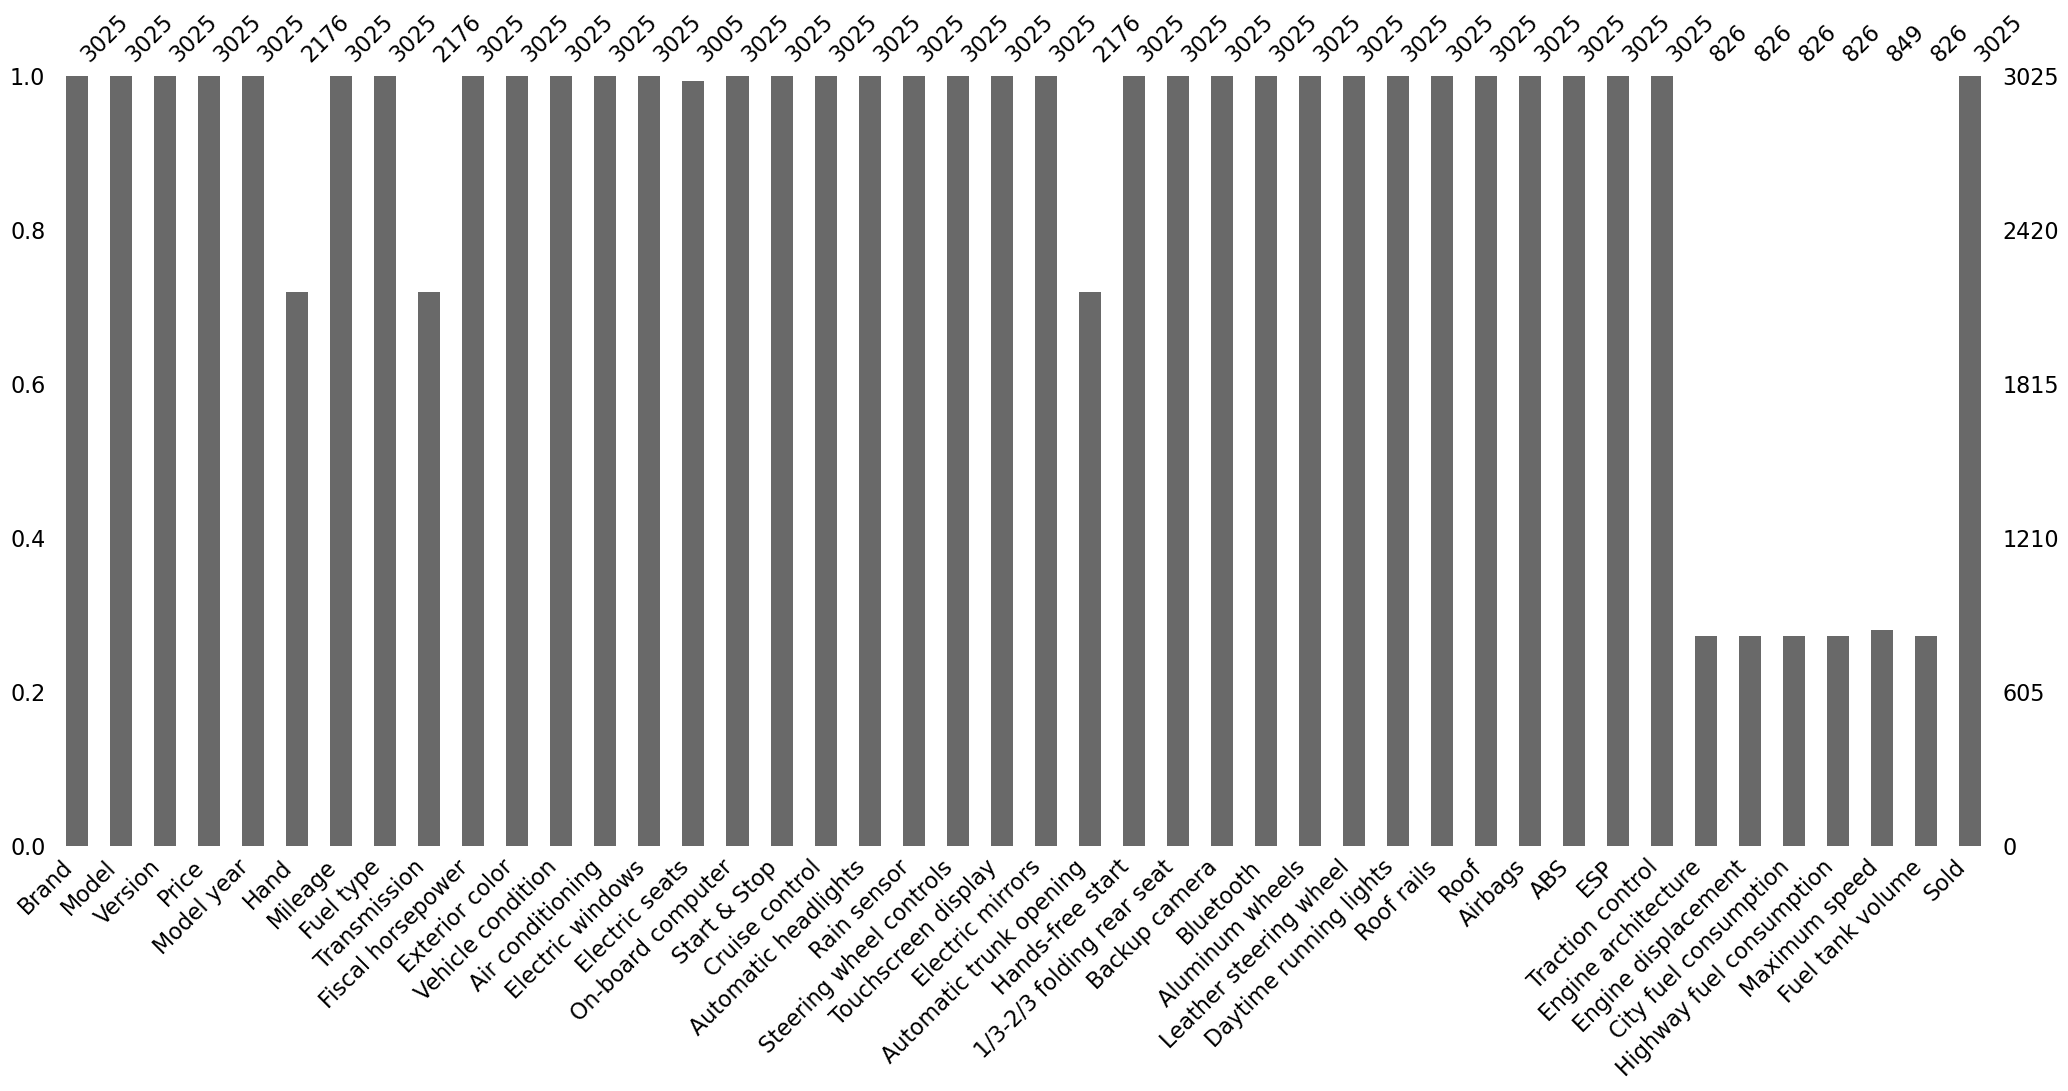

In [31]:
# Show the percentage of completeness in columns
msno.bar(data)

**Fill the missings of Version column**

In [32]:
# Show  different verisons 
data['Version'].value_counts()

Autre version                                  1221
1.7 CDTi Cosmo                                   32
1.5 dCi Authentique                              27
220 CDI                                          24
1.6 HDi Active                                   16
1.9 dCi Dynamique                                15
1.5 dCi Explore                                  15
1.6 HDi 92 Active                                12
2.0 TDI 150 Confortline                          12
1.5 dCi 85 Intens                                12
1.5 dCi 85 Limited                               12
1.6 TDI Highline                                 12
2.0 TDI Confortline                              11
1.9 TDI Confortline                              11
1.5 dCi 110 Smart                                11
2.0 TDI Highline                                 11
1.5 dCi 85 Business                              11
1.5 dCi 110 Acenta                               10
1.1 Urban                                        10
1.5 dCi 90 A

There are some cars where the version is not specified, but it is set to 'Autre version'. So, we can fill the nan values of 'Version' column with 'Autre version' since every car has a version

In [33]:
#Print the number of missings in 'Version' column
version_missings = data['Version'].isna().sum()
print( f'There are {version_missings} missings in Version column')

# Give to empty 'Version' cells the string 'Autre version'
data = data.fillna({'Version':'Autre version'})

# Verify all the missings are filled 
version_missings = data['Version'].isna().sum()
print(f'There are still {version_missings} missings')

There are 0 missings in Version column
There are still 0 missings


**Fill the missings of Model year column**

In [34]:
# Describe the Model year column
data['Model year'].describe()

count    3025.000000
mean     2012.004298
std         4.584341
min      1984.000000
25%      2011.000000
50%      2012.000000
75%      2015.000000
max      2022.000000
Name: Model year, dtype: float64

In [35]:
# Fill the missings withe the mean value
data['Model year'] =  data['Model year'].fillna(2012.0)

# Check the number of missings
data['Model year'].isna().sum()

0

**Fill the missings of Hand column**

In [36]:
# Create a new category of NaN values
data['Hand'] = data['Hand'].fillna('Not specified')

# Show changes
data['Hand'].isna().sum()

0

**Fill missings in Mileage column**

In [37]:
# Fill the missings with the mean value
data['Mileage'] = data['Mileage'].fillna('148.795 km')

# check the Mileage column
data['Mileage'].isna().sum()

0

**Fill missings in Fuel type column**

In [38]:
# Print the value counts
data['Fuel type'].value_counts()

Diesel        2761
Essence        256
Hybride          7
Electrique       1
Name: Fuel type, dtype: int64

In [39]:
# Fill the missing with the frequente value
data['Fuel type']  = data['Fuel type'].fillna('Not specified')

# Check the missings
data['Fuel type'].isna().sum()

0

**Fill missings in Transmission column**

In [40]:
# Print the categories of Transmission
data['Transmission'].value_counts()

Manuelle       1145
Automatique    1031
Name: Transmission, dtype: int64

In [41]:
# Create new category for missing values
data['Transmission'] = data['Transmission'].fillna('Not specified')

# Check changes
data['Transmission'].isna().sum()

0

**Fill the missings in 'Exterior color' column**

In [42]:
# Show the different vehicule's colors 
data['Exterior color'].value_counts()

Autre couleur    1133
Noir              617
Blanc             279
Gris foncé        224
Gris              221
Gris clair        155
Bleu foncé         87
Marron             50
Bleu               49
Rouge              47
Beige              31
Blanc cassé        24
Bleu ciel          23
Bordeau            21
Marron clair       17
Vert foncé         13
Jaune d'or         10
Violet              9
Vert                9
Orange              2
Jaune               2
Rose                2
Name: Exterior color, dtype: int64

We have a 'Autre couleur' category. So, we can join the missings to this cotegory since every vehicule has a color

In [43]:
# Fill the missings with 'Autre couleur'
data['Exterior color']  = data['Exterior color'].fillna('Autre couleur')

# Replace the '-' category with 'Autre couleur'
data['Exterior color'] = data['Exterior color'].replace('-','Autre couleur')

# Check the missings
data['Exterior color'].isna().sum()

0

**Fill missings in Vehicule condition column**

In [44]:
data['Vehicle condition'].value_counts()

Not described    1068
Excellent         738
Très bon          549
Comme neuve       519
Bon               132
Correct            19
Name: Vehicle condition, dtype: int64

As we can say above, there is a category of '-' which means that the vehicle is not described. So, we can replace it with the NaN values with a new cotergory 'Not described'

In [45]:
# Fill the missings
data['Vehicle condition'] = data['Vehicle condition'].fillna('Not described')

# Change the '-' category
data['Vehicle condition'] =data['Vehicle condition'].replace('-', 'Not described')

# Check the changes
data['Vehicle condition'].value_counts()

Not described    1068
Excellent         738
Très bon          549
Comme neuve       519
Bon               132
Correct            19
Name: Vehicle condition, dtype: int64

'Not described' category has 1068 entries, what was '-' and NaN

**Fill missings in 'Automatic trunk opening' column**

Since cars with the same brand and model share many similarities, we affect to missings in 'Automatic trunk opening' with the values of rows with the same brand and model.

In [46]:
# Create new category 'Not specified' for missing values 
data['Automatic trunk opening'] = data['Automatic trunk opening'].fillna('Not specified')

#Check changes
data['Automatic trunk opening'].isna().sum()

0

**Fill missings in 'Engine architecture' column**

In [47]:
# Create new category for missing values
data['Engine architecture'] = data['Engine architecture'].fillna('Not specified')

# Check changes
data['Engine architecture'].isna().sum()

0

**Fill missings in 'Engine displacement' column**

In [48]:
# Fill the missings with the mean value (this value is found in the data type problems)
data['Engine displacement'] = data['Engine displacement'].fillna('2007.43 cm³')

# check the Mileage column
data['Engine displacement'].isna().sum()

0

**Fill missings in 'City fuel consumption' column**

In [49]:
# Fill the missings with the mean value (this value is found in the data type problems)
data['City fuel consumption'] = data['City fuel consumption'].fillna('6,6 l/100 km')

# check the Mileage column
data['Highway fuel consumption'].isna().sum()

2199

**Fill missings in 'Highway fuel consumption' column**

In [50]:
# Fill the missings with the mean value (this value is found in the data type problems)
data['Highway fuel consumption'] = data['Highway fuel consumption'].fillna('4,88 l/100 km')

# check the Mileage column
data['Highway fuel consumption'].isna().sum()

0

**Fill missings in 'Maximun speed' column**

In [51]:
# Fill the missings with the mean value (this value is found in the data type problems)
data['Maximum speed'] = data['Maximum speed'].fillna('2009 km/h')

# check the Mileage column
data['Maximum speed'].isna().sum()

0

**Fill missings in 'Fuel tank volume' column**

In [52]:
# Fill the missings with the mean value (this value is found in the data type problems)
data['Fuel tank volume'] = data['Fuel tank volume'].fillna('58 litre')

# check the Mileage column
data['Fuel tank volume'].isna().sum()

0

**Verify if there are still any missing values.**

<AxesSubplot:>

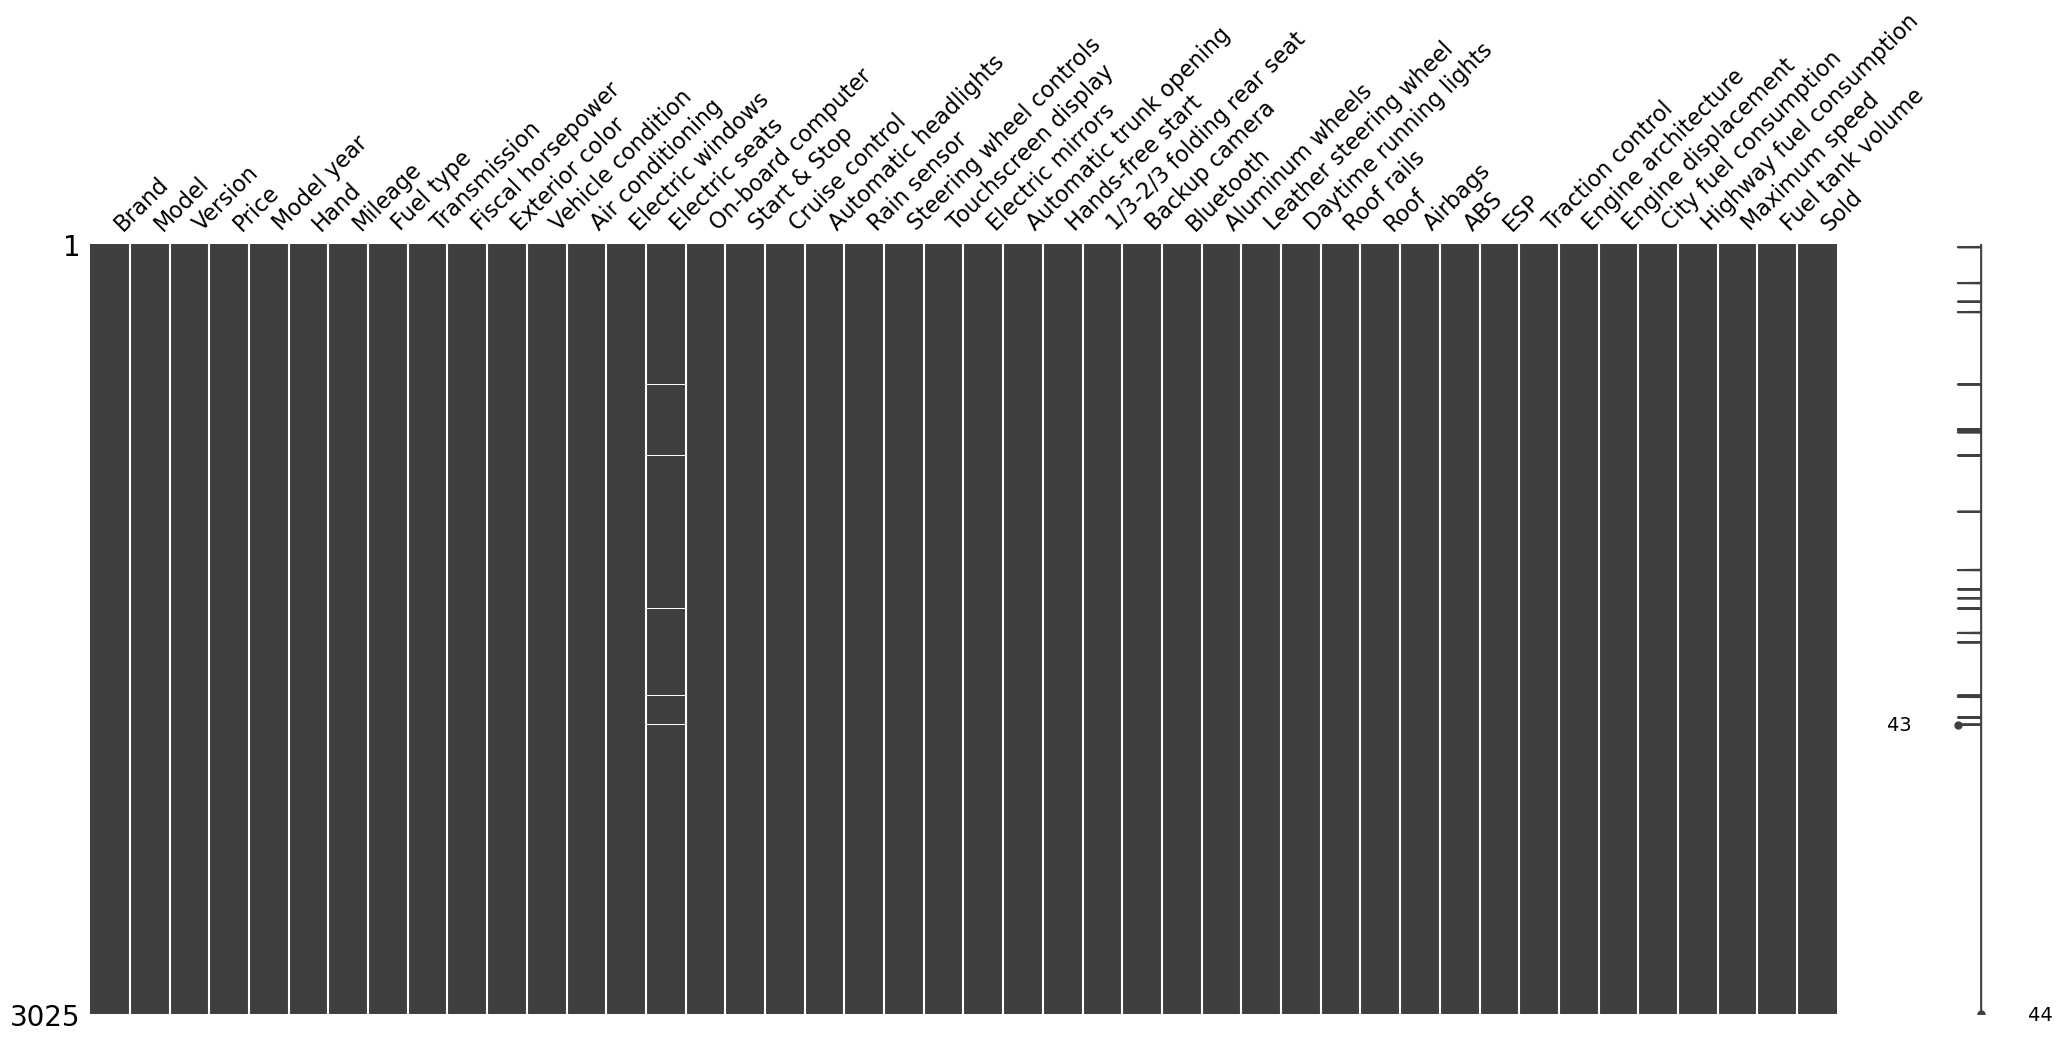

In [59]:
# Show missings matrix
msno.matrix(data)

So, we have filled all the missing values, except for those in the Electric seats column that we still need to address.

**Fill missings in Electric seats column**

In [60]:
# Count missings
data['Electric seats'].isna().sum()

20

In [62]:
# Describe column
data['Electric seats'].describe()

count     3005
unique       5
top        non
freq      1993
Name: Electric seats, dtype: object

In [63]:
# Print categories
data['Electric seats'].value_counts()

non                       1993
Conducteur et Passager     584
Conducteur                 340
Tous les passagers          76
Passager                    12
Name: Electric seats, dtype: int64

In [65]:
# Describe data
data[data['Electric seats'].isna()].describe(include='all')

,Brand,Model,Version,Price,Model year,Hand,Mileage,Fuel type,Transmission,Fiscal horsepower,Exterior color,Vehicle condition,Air conditioning,Electric windows,Electric seats,On-board computer,Start & Stop,Cruise control,Automatic headlights,Rain sensor,Steering wheel controls,Touchscreen display,Electric mirrors,Automatic trunk opening,Hands-free start,1/3-2/3 folding rear seat,Backup camera,Bluetooth,Aluminum wheels,Leather steering wheel,Daytime running lights,Roof rails,Roof,Airbags,ABS,ESP,Traction control,Engine architecture,Engine displacement,City fuel consumption,Highway fuel consumption,Maximum speed,Fuel tank volume,Sold
count,20,20,20,20,20.000000,20,20,20,20,20,20,20,20,20,0,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
unique,10,20,18,19,NaN,2,19,2,2,7,6,5,5,3,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,1,1,1,1,1,1,2
top,PEUGEOT,CLS Coupé 2013,Autre version,100.000 DH,NaN,Première,100.000 km,Diesel,Automatique,6 cv,Noir,Excellent,auto. Bi-zone,Electrique AV/AR,NaN,oui,non,oui,oui,oui,oui,oui,oui,non,oui,oui,oui,oui,oui,non,oui,non,Rigide,oui,oui,oui,oui,Not specified,2007.43 cm³,"6,6 l/100 km","4,88 l/100 km",2009 km/h,58 litre,non
freq,4,1,3,2,NaN,13,2,19,11,6,9,7,7,11,NaN,17,11,17,13,13,18,14,17,11,11,13,11,16,17,15,14,11,19,20,20,18,17,20,20,20,20,20,20,11
mean,NaN,NaN,NaN,NaN,2013.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,3.315038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2015.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data[data[]]

<h2 style="color: blue">Data type problems </h2>

<h3 style="color: purple">Task 1:</h3> Remove 'DH' or 'DH VENDUE' from Price and convert it to float and create a column that indicated if a vehicule is sold or not.

In [53]:
# # Create a column named 'Sold' where we give 'oui' if the car is 'VENDUE' and 'non' if not
# data['Price'] = data['Price'].astype('str')
# data['Sold'] = data['Price'].apply(lambda x: 'oui' if len(x.split()) > 2 and x.split()[2] == "VENDUE" else 'non')

# # Count of every category
# print(data['Sold'].value_counts())

# # Show changes
# data.head()

In [54]:
# # Remove 'DH' or 'DH VENDUE' from 'Price'
# data['Price'] = data['Price'].str.split().str.get(0)
# data['Price'] = data['Price'].str.replace('.','')

# data['Price'].head()

In [55]:
# # Convert price to float
# data['Price'] = data['Price'].astype('float')

# # Show changes
# data['Price'].dtypes

<h3 style="color: purple">Task 2:</h3>Remove km from Mileage and convert it to float

In [56]:
# # Remove 'km' and '.' from Mileage column 
# data['Mileage'] = data['Mileage'].str.strip('km').str.replace('.','') 

# #show changes
# data['Mileage'].head()

In [57]:
# # Convert 'Mileage' to float
# data['Mileage'] = data['Mileage'].astype('float')

# # Show the new type of 'Mileage' column
# data['Mileage'].dtypes

<h3 style="color: purple">Task 6:</h3> Convert `Maximun speed` to float

In [58]:
# data['Maximum speed'].value_counts()